In [29]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [31]:
import os
home_dir = os.environ['HOME']

style_files = sorted(os.listdir('/'.join([home_dir, 'Pictures/styles'])))
styles = widgets.SelectMultiple(
    options=style_files,
    value=[style_files[0]],
    rows=20,
    description='Styles',
    disabled=False,
    continuous_update=True
)

style_weight_1 = widgets.FloatSlider(
    value=1,
    min=0,
    max=1.0,
    step=0.1,
    description='Weight 1',
    disabled=False,
    continuous_update=False,
    orientation='horizontal'
)
style_weight_2 = widgets.FloatSlider(
    value=1,
    min=0,
    max=1.0,
    step=0.1,
    description='Weight 2',
    disabled=False,
    continuous_update=False,
    orientation='horizontal'
)

style_weight_3 = widgets.FloatSlider(
    value=1,
    min=0,
    max=1.0,
    step=0.1,
    description='Weight 3',
    disabled=False,
    continuous_update=False,
    orientation='horizontal'
)

content_size = widgets.IntSlider(
    value=2560,
    min=512,
    max=2560,
    step=256,
    description='Content Size',
    disabled=False,
    continuous_update=False,
    orientation='horizontal'
)

style_size = widgets.IntSlider(
    value=1024,
    min=512,
    max=2560,
    step=256,
    description='Style Size',
    disabled=False,
    continuous_update=False,
    orientation='horizontal'
)

content_files = sorted(os.listdir('/'.join([home_dir, 'Pictures/Reference'])))
content = widgets.Select(
    options=content_files,
    value=content_files[0],
    rows=20,
    description='Content',
    disabled=False
)
widgets.HBox([styles, content, widgets.VBox([style_size, content_size, style_weight_1, style_weight_2, style_weight_3])])


1.0,1.0
/home/nan/Pictures/styles/la_muse.jpg,/home/nan/Pictures/styles/mage_by_guweiz-d9wivof.jpg
Number of content images: 1
Number of style images: 1


/home/nan/.local/share/virtualenvs/tf-adain-MWIFD2qK/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/nan/.local/share/virtualenvs/tf-adain-MWIFD2qK/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


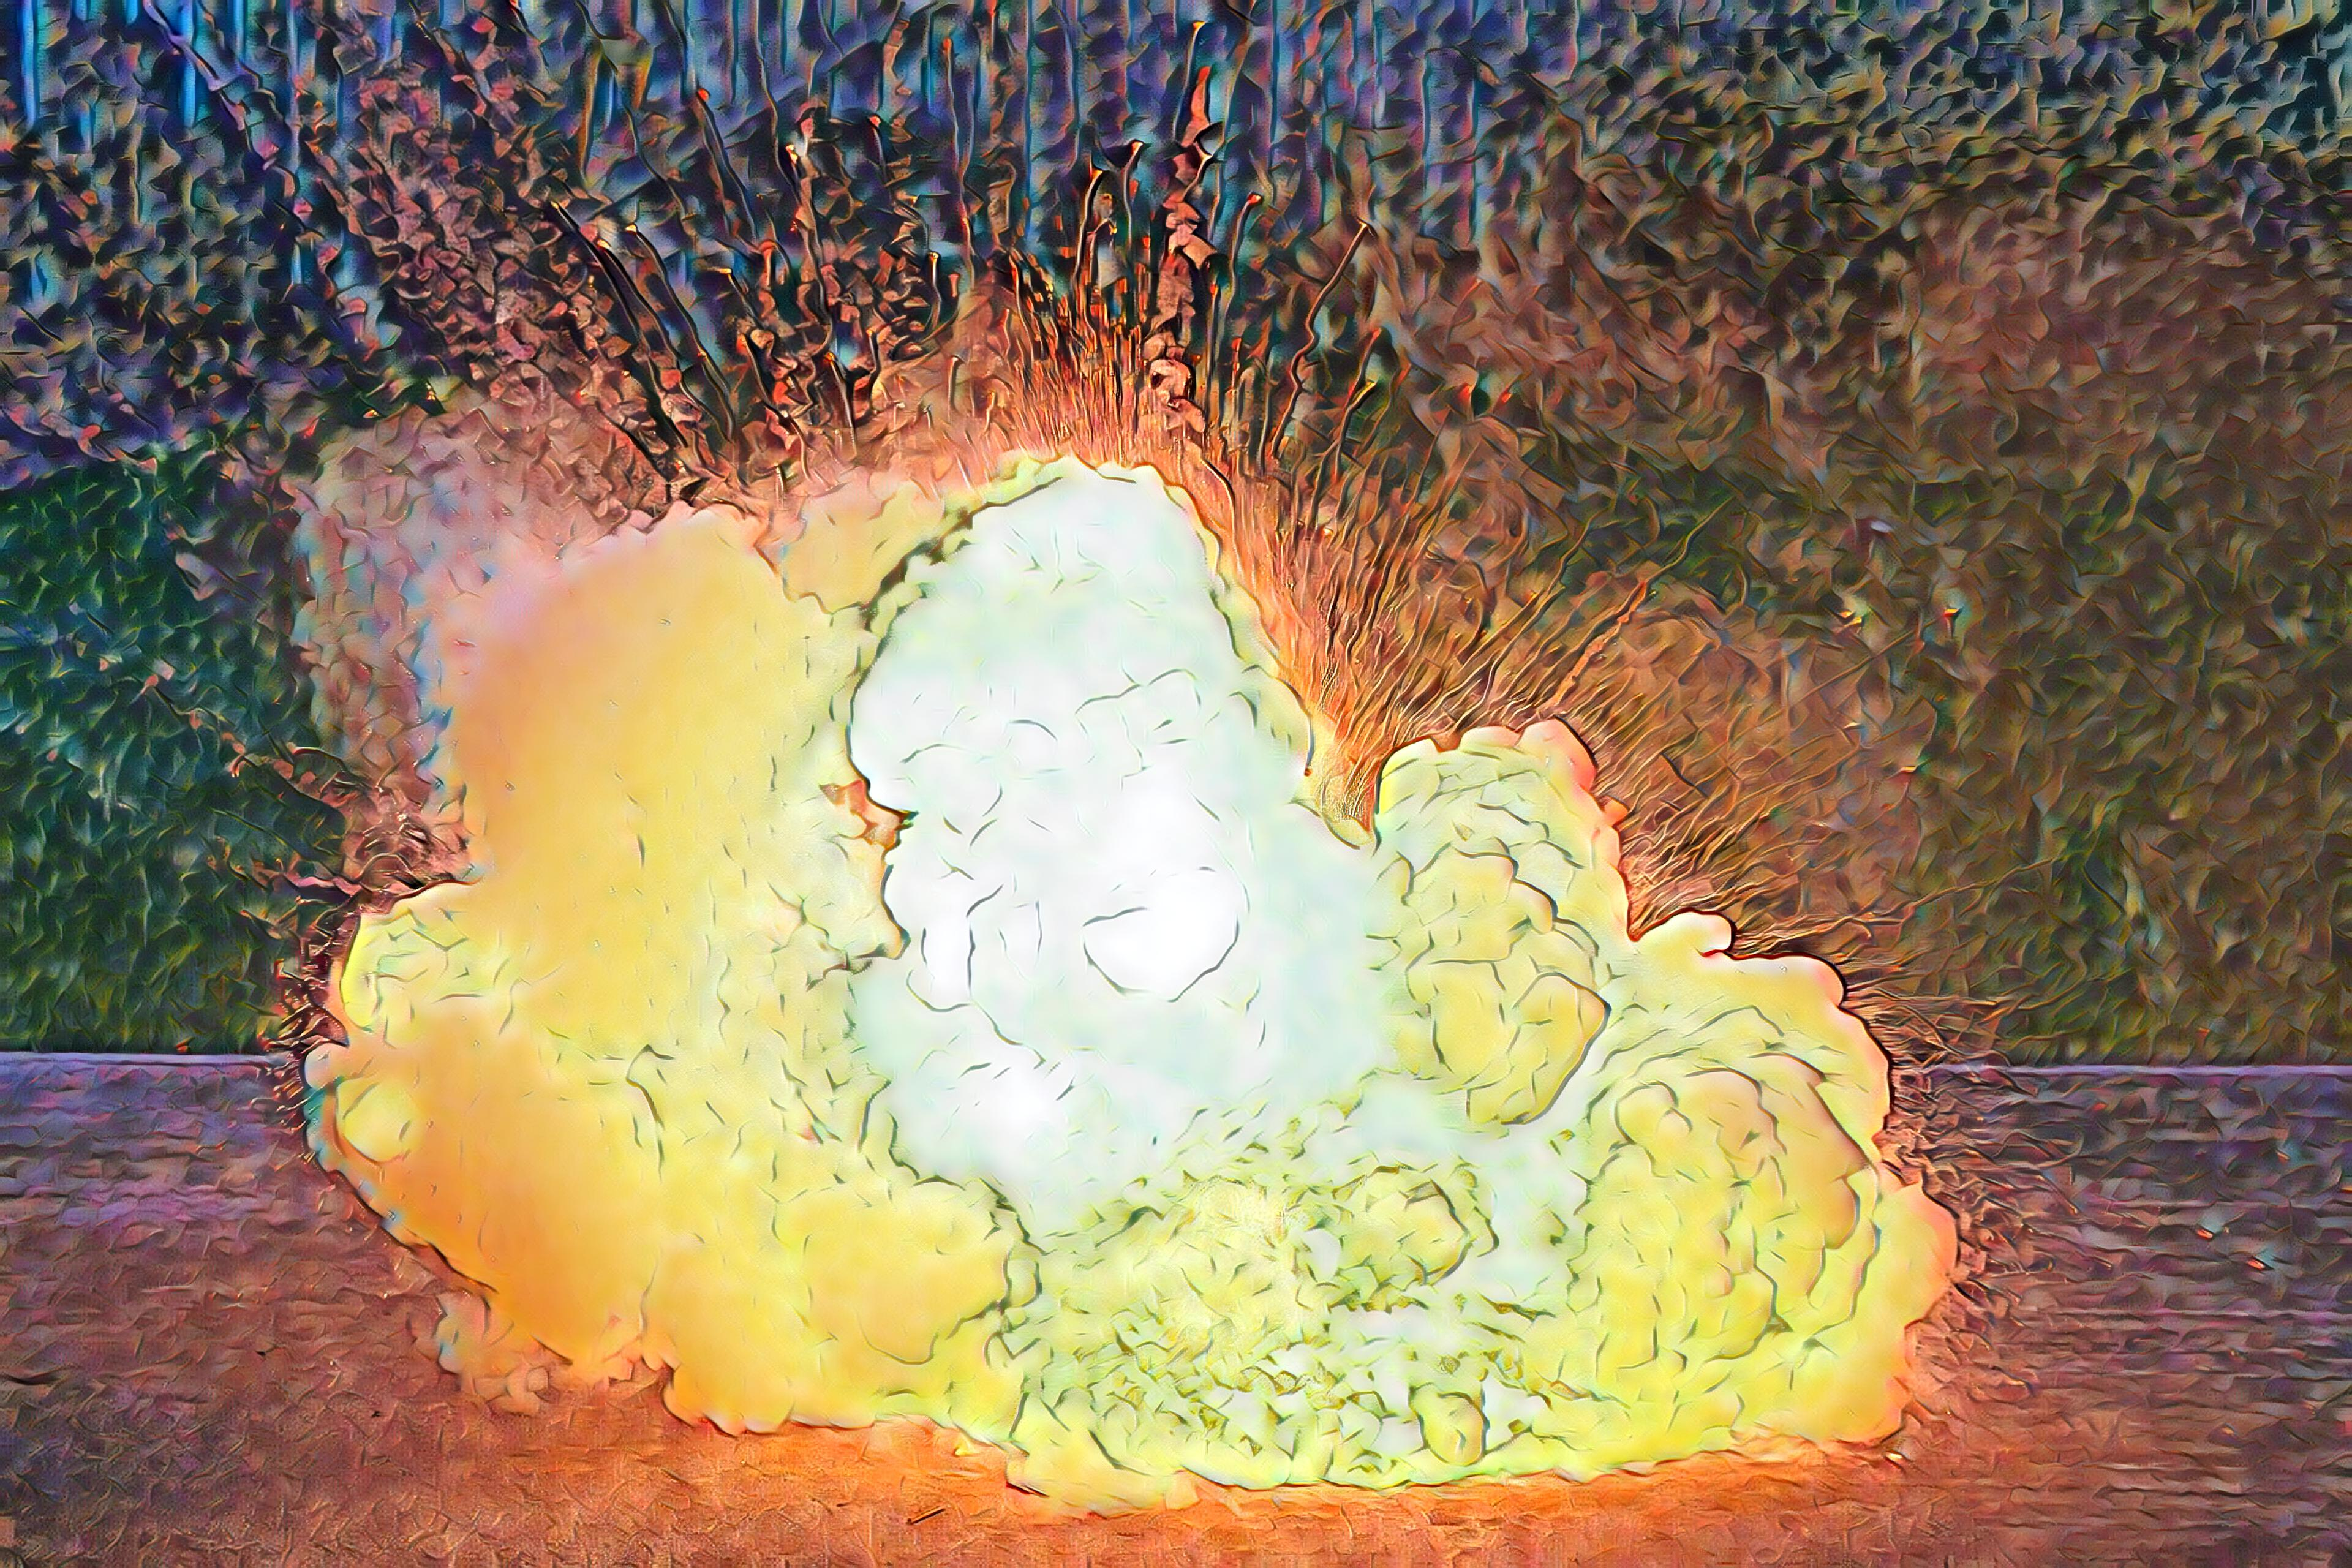

In [41]:
import tensorflow as tf
tf.reset_default_graph()

def display_image(path):
    file = open(path, "rb")
    image = file.read()
    return widgets.Image(
        value=image,
        format='png',
#         width=800,
#         height=400
    )


weight_vals = [style_weight_1.value, style_weight_2.value, style_weight_3.value]
weight_vals = weight_vals[:len(styles.value)]
    
weights = ",".join(str(x) for x in weight_vals)

style_formater = lambda style: '/'.join([home_dir, 'Pictures/styles', style])
style_val = ','.join(str(style_formater(x)) for x in styles.value)
crop_style=False

if len(styles.value) > 1:
    crop_style = True
    
content_val = '/'.join([home_dir, 'Pictures/Reference', content.value])
out_dir = '/'.join([home_dir, 'Pictures/arbitrary_image_stylization', os.path.splitext(content.value)[0]])

print(weights)
print(style_val)
# print(dir(widgets.Image))

from style_transfer import style_transfer


stylized = style_transfer(
    content=content_val,
    style=style_val,
    content_size=content_size.value,
    output_dir=out_dir,
    style_size=style_size.value,
    crop_style=crop_style,
    style_interp_weights=weights
)

# image_views = [display_image(x) for x in stylized]
# widgets.HBox(image_views)

from IPython.display import Image, display

for imageName in stylized:
    display(Image(filename=imageName))